## Import Necessary Libraries 

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

### Read Data 

In [2]:
train = pd.read_csv('train.psv', sep='|')
train.shape

(380282, 41)

In [3]:
train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

## Distribution of Dependent Variable 

In [4]:
train['SepsisLabel'].value_counts()

0    374680
1      5602
Name: SepsisLabel, dtype: int64

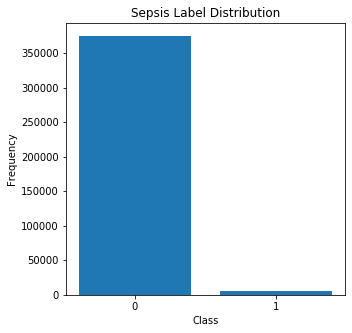

In [8]:
rcParams['figure.figsize'] = 5, 5

plt.bar(train['SepsisLabel'].value_counts().index,
        train['SepsisLabel'].value_counts())
plt.xticks([0,1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

As we can see from the plot, it is a case of severe class imbalance . There are multiple methods that we could try to balance it (Over sampling or Undersampling) or even proceed without balancing but change the evaluation metric to average precision or roc_auc_sore